# 実践演習10-5

scikit-learnで識別にアンサンブル学習を適用します。

ライブラリの読み込み

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

breast_cancerデータを読み込んでX, yに格納後、概要を表示します。

In [2]:
bc = load_breast_cancer()
X = bc.data
y = bc.target
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

主成分分析を行い、その結果を表示します。

[0.98204467 0.01617649]


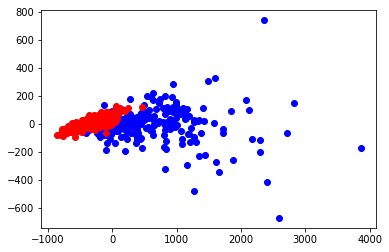

In [3]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_) 
X2 = pca.fit_transform(X)
plt.plot(X2[y==0,0], X2[y==0,1], 'bo')
plt.plot(X2[y==1,0], X2[y==1,1], 'ro')

## バギング

base_estimator引数で識別器を指定します。Noneの場合は決定木になります。

In [4]:
clf1 = ensemble.BaggingClassifier()
clf1.fit(X, y)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

交差確認法で評価します。

In [5]:
scores = cross_val_score(clf1, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 200))

94.93 +/- 3.33 %


## ランダムフォレスト

In [6]:
clf2 = ensemble.RandomForestClassifier()
clf2.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

交差確認法で評価します。

In [7]:
scores = cross_val_score(clf2, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 200))

95.62 +/- 3.02 %


## Adaブースト

In [8]:
clf3 = ensemble.AdaBoostClassifier()
clf3.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

交差確認法で評価します。

In [9]:
scores = cross_val_score(clf3, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 200))

95.96 +/- 1.77 %


## 勾配ブースティング

In [10]:
clf4 = ensemble.GradientBoostingClassifier()
clf4.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

交差確認法で評価します。

In [11]:
scores = cross_val_score(clf4, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() *200))

96.32 +/- 2.51 %


### 補足

特徴の重要性を確認するコード

Feature ranking:
1. worst radius (0.439429)
2. worst perimeter (0.153789)
3. mean concave points (0.128629)
4. worst concave points (0.121755)
5. worst texture (0.045836)
6. worst area (0.030097)
7. mean texture (0.017482)
8. worst concavity (0.012708)
9. area error (0.008317)
10. compactness error (0.008209)
11. worst smoothness (0.007148)
12. concave points error (0.004378)
13. texture error (0.003483)
14. radius error (0.002423)
15. worst fractal dimension (0.002402)
16. concavity error (0.002172)
17. symmetry error (0.002127)
18. mean compactness (0.001431)
19. fractal dimension error (0.001430)
20. mean area (0.001238)
21. mean concavity (0.001001)
22. perimeter error (0.000891)
23. smoothness error (0.000808)
24. worst symmetry (0.000784)
25. worst compactness (0.000601)
26. mean symmetry (0.000568)
27. mean perimeter (0.000401)
28. mean fractal dimension (0.000366)
29. mean radius (0.000087)
30. mean smoothness (0.000011)


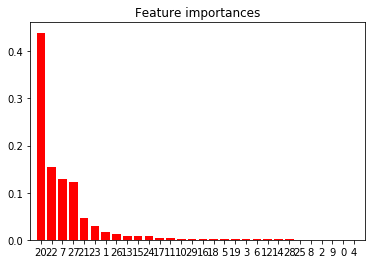

In [12]:
importances = clf4.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, bc.feature_names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()